In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams 
rcParams['figure.figsize'] = 20, 10 
rcParams['font.size'] = 16

from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


# Least Squares Linear Regression

Let's start with something really simple - Least Squares Linear Regression from one parameter

## Creating the dataset

Let's create dataset $y=x+10$ on the segment [-20, 20] with adding a simple noise

In [2]:
X_train = (np.random.rand(100) - 0.5) * 40
y_train = X_train + 10.0 + np.random.rand(100) * 10

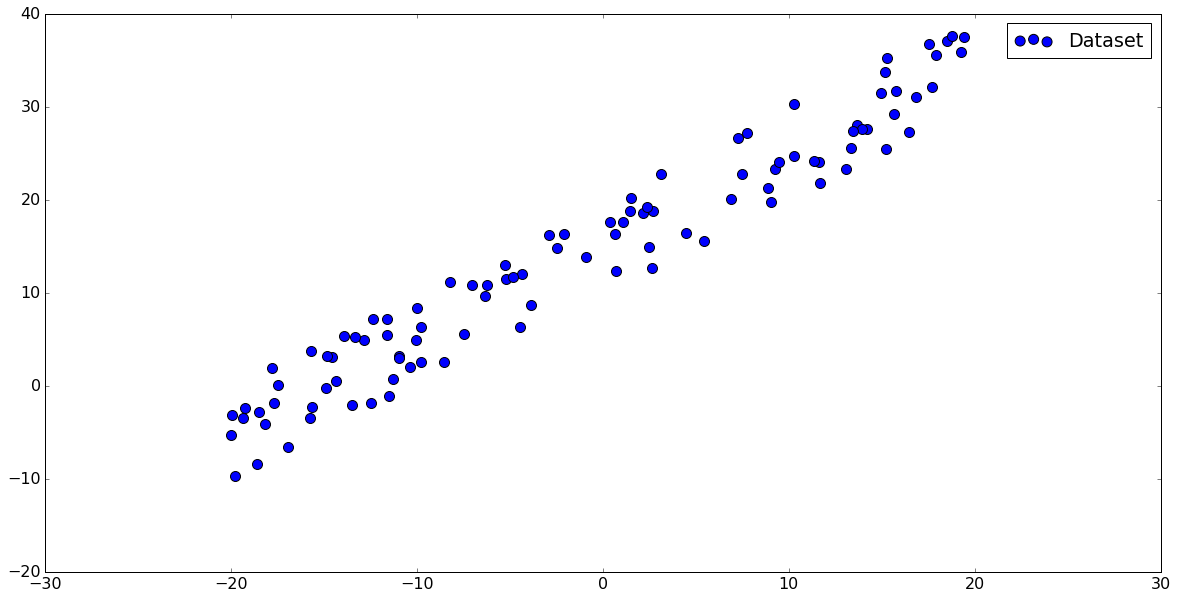

In [3]:
plt.scatter(X_train, y_train, s=100, label='Dataset')
plt.legend()

## Doing Linear Regression via Keras

In [4]:
input = Input(shape=(1,))
output = Dense(1)(input)

model = Model(inputs=input, outputs=output)

We will compile the model with **Mean Sqared Error** loss which is used for Least Squares problem

In [5]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=.3))
model.fit(X_train, y_train, epochs=10, batch_size=5)

Epoch 1/10
100/100 [==============================] - 0s 2ms/step - loss: 191.6798
Epoch 2/10
100/100 [==============================] - 0s 350us/step - loss: 68.1447
Epoch 3/10
100/100 [==============================] - 0s 380us/step - loss: 21.1334
Epoch 4/10
100/100 [==============================] - 0s 330us/step - loss: 10.4420
Epoch 5/10
100/100 [==============================] - 0s 320us/step - loss: 9.0792
Epoch 6/10
100/100 [==============================] - 0s 340us/step - loss: 9.6078
Epoch 7/10
100/100 [==============================] - 0s 320us/step - loss: 9.1667
Epoch 8/10
100/100 [==============================] - 0s 370us/step - loss: 9.3602
Epoch 9/10
100/100 [==============================] - 0s 320us/step - loss: 10.1097
Epoch 10/10
100/100 [==============================] - 0s 340us/step - loss: 9.1202


Let's check how our model predicts data

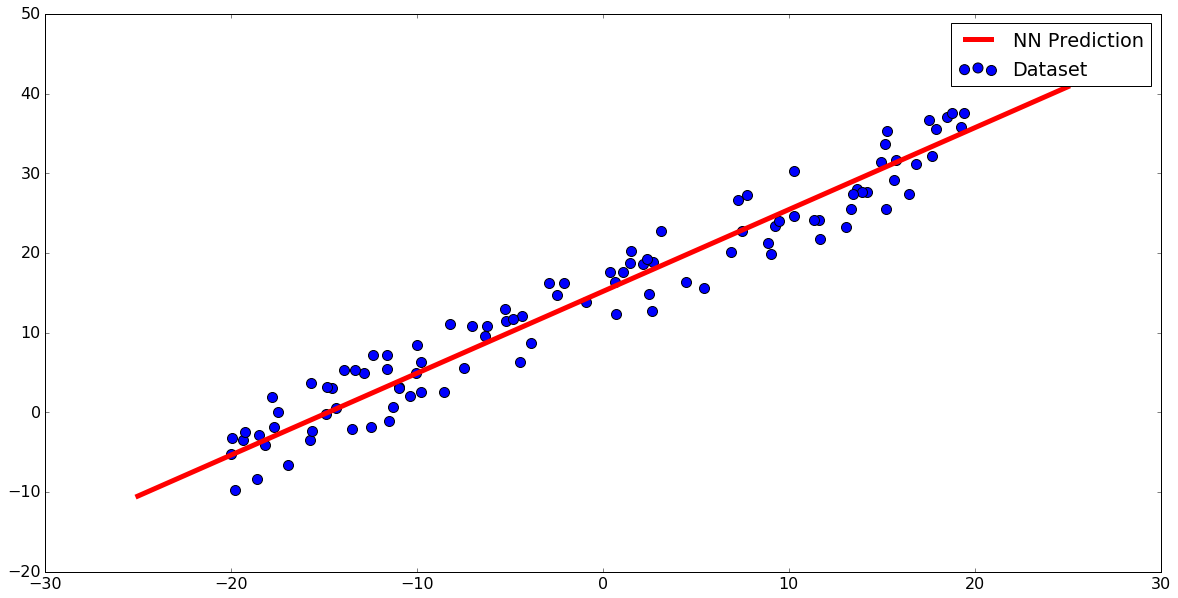

In [6]:
X_test = np.arange(-25.0, 25.0, 0.01)
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, c='b', s=100, label='Dataset')
plt.plot(X_test, y_pred, c='r', lw=5, label='NN Prediction')
plt.legend()

# Sin Approximation

## Creating the dataset

We will create a dataset for sinus depending on X value

We create two datasets randomly spreaded on the segment from -20 to 20 with a sin(x) computed for each point.

The first dataset consists of 2000 samples and another one consists of 20 samples

In [7]:
X_train_big = (np.random.rand(2000) - 0.5) * 40
y_train_big = np.sin(X_train_big)

X_train_small = (np.random.rand(20) - 0.5) * 40
y_train_small = np.sin(X_train_small)

## Fitting the Big Dataset

Let's create a deep NN for approximating or function

In [8]:
input = Input(shape=(1,))
x = Dense(50, activation='relu')(input)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=input, outputs=output)

We will compile the model with **Mean Sqared Error** loss and increased LR (which was carefully finetuned by ourselves)

In [9]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.007))

In [10]:
model.fit(X_train_big, y_train_big, epochs=200, batch_size=40, verbose=0)  # setting verbose=0 so it fits data silently

Let's check how close our model to actual **sin(x)**

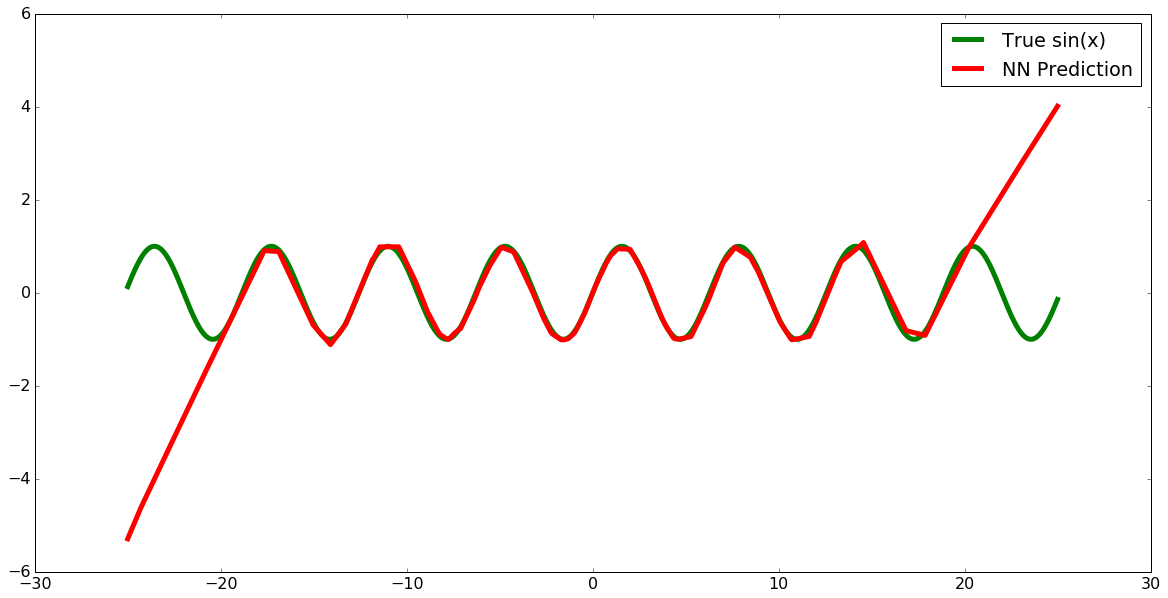

In [11]:
X_test = np.arange(-25.0, 25.0, 0.01)
y_pred = model.predict(X_test)
y_true = np.sin(X_test)

plt.plot(X_test, y_true, c='g', lw=5, label='True sin(x)')
plt.plot(X_test, y_pred, c='r', lw=5, label='NN Prediction')
plt.legend()

## Fitting the Small Dataset

Let's create a more complex model to fit our small dataset

In [12]:
input = Input(shape=(1,))
x = Dense(200, activation='relu')(input)
x = Dense(200, activation='relu')(x)
x = Dense(200, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=input, outputs=output)

We compile the model in the same way as previous one

In [13]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=.007))

In [14]:
model.fit(X_train_small, y_train_small, epochs=4000, batch_size=20, verbose=0)  # setting verbose=0 so it fits data silently

Let's check how close our model to actual **sin(x)**

You clearly see that our model overfit the data but didn't generalize the problem

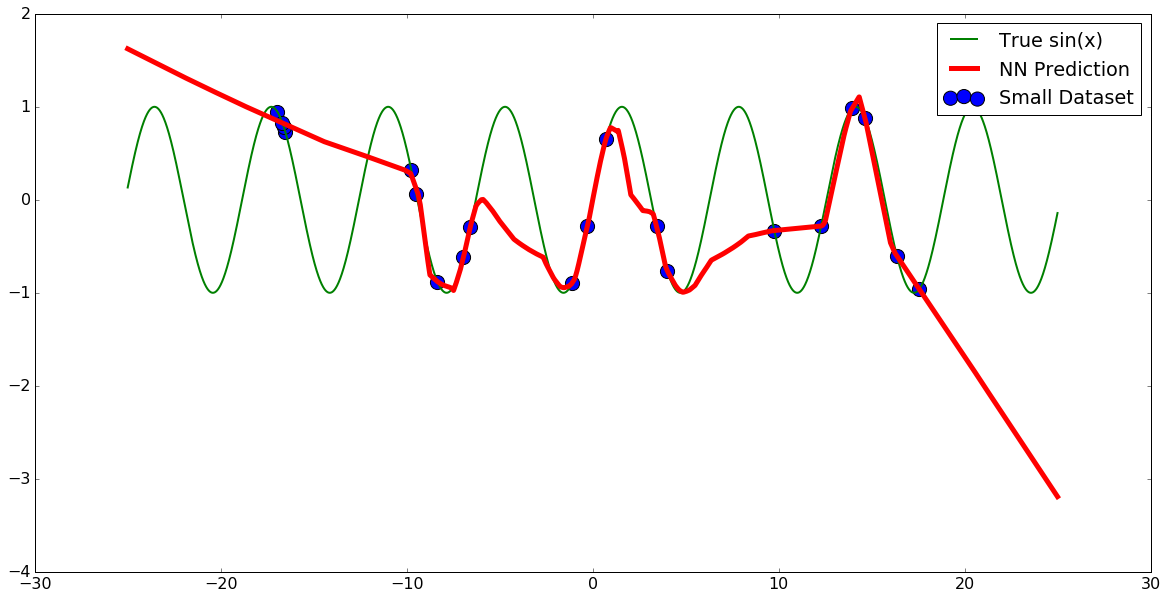

In [15]:
X_test = np.arange(-25.0, 25.0, 0.01)
y_pred = model.predict(X_test)
y_true = np.sin(X_test)

plt.plot(X_test, y_true, c='g', lw=2, label='True sin(x)')
plt.plot(X_test, y_pred, c='r', lw=5, label='NN Prediction')
plt.scatter(X_train_small, y_train_small, c='b', s=200, label='Small Dataset')
plt.legend()